In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

# TASK 3

Flag detected and cropped.
[106.89893333  57.25293333 224.71683333] [154.8932     150.92536667 190.49713333]
Classification: Poland Flag


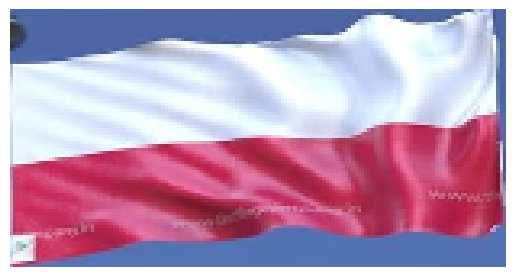

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def detect_and_crop_flag(image):
    """Detects red-white region and returns cropped flag image or None."""
    resized = cv.resize(image, (600, 400))
    hsv = cv.cvtColor(resized, cv.COLOR_BGR2HSV)

    # Red mask
    mask_red1 = cv.inRange(hsv, (0, 100, 100), (10, 255, 255))  # for Lower hue reds
    mask_red2 = cv.inRange(hsv, (160, 100, 100), (180, 255, 255))   #for Upper hue reds
    mask_red = cv.bitwise_or(mask_red1, mask_red2)

    # White mask
    mask_white = cv.inRange(hsv, (0, 0, 150), (180, 50, 255))
    combined_mask = cv.bitwise_or(mask_red, mask_white)
    # Find contours
    contours, _ = cv.findContours(combined_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None, "No red-white region found."

    largest = max(contours, key=cv.contourArea)
    x, y, w, h = cv.boundingRect(largest)

    if w < 1.2 * h:
        return None, "Detected shape isn't flag-like."

    flag_crop = resized[y:y+h, x:x+w]
    return flag_crop, "Flag detected and cropped."


def classify_flag(image):
    """Classifies flag image as Indonesia or Poland based on color in halves."""
    flag = cv.resize(image, (300, 200))
    hsv = cv.cvtColor(flag, cv.COLOR_BGR2HSV)

    # Top and bottom halves
    height = hsv.shape[0]
    top_half = hsv[:height//2, :] #hsv[:100, :]
    bottom_half = hsv[height//2:, :] #hsv[100:, :]
# resized the image into width=300 and height=200 so top_half is taken for upper 100 pixels and bottom_half for lower 100 pixels
    # Calculate mean hue/saturation/value
    top_mean = np.mean(top_half, axis=(0, 1))
    bottom_mean = np.mean(bottom_half, axis=(0, 1))
    print(top_mean, bottom_mean)
    # Logic:
    # Indonesia: red (top), white (bottom)
    # Poland: white (top), red (bottom)

    # White in HSV: White color doesn't have hue, Low Saturation (e.g., < 50) and high Value (e.g., > 150)
    # Red in HSV: Hue around 0-10 or 160-180, high Saturation (e.g., > 100), high Value

    # Condition for Indonesia: Red on top AND White on bottom
    #taking a safe range
    is_top_red = (top_mean[0] < 20 or top_mean[0] > 150) and top_mean[1] > 100
    is_bottom_white = bottom_mean[1] < 65 and bottom_mean[2] > 150 # Check saturation and value for white

    if is_top_red and is_bottom_white:
        return "Indonesia Flag"

    # Condition for Poland: White on top AND Red on bottom
    #taking a safe range
    is_top_white = top_mean[1] < 65 and top_mean[2] > 150
    is_bottom_red = (bottom_mean[0] < 20 or bottom_mean[0] > 150) and bottom_mean[1] > 100

    if is_top_white and is_bottom_red:
         return "Poland Flag"

    else:
        return "Uncertain"

image=cv.imread(".jpg")
flag_crop, msg = detect_and_crop_flag(image)
print(msg)
flag_crop_rgb=cv.cvtColor(flag_crop, cv.COLOR_BGR2RGB)
plt.imshow(flag_crop_rgb)
plt.axis('off')
result = classify_flag(flag_crop)
print(f"Classification: {result}")
